<a href="https://colab.research.google.com/github/neonithinar/GTRSB/blob/main/GTRSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GTSRB for oburcullum


In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pathlib
import cv2

In [2]:
! wget "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip" -O temp.zip
! unzip temp.zip
! rm temp.zip

# dataset_url = "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip"
# data_dir = tf.keras.utils.get_file('GTRSB', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Final_Training/Images/00035/00000_00019.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00020.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00021.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00022.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00023.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00024.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00025.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00026.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00027.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00028.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00029.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00000.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00001.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00002.ppm  
  inflating: GTSRB/Final_Training/Image

In [3]:
data_dir = os.path.join("/content/GTSRB/Final_Training/Images")
img_width = 48
img_height = 48
ext = [".ppm"]
batch_size = 32

In [4]:
# complete_ds = keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Seems like keras doesnot like the naming format for the filenames or folder names. so let's first replace the subfolder names with the actual class names of the traffic signals


In [5]:
name_dict = {"00000":"00000_speed_limit_20kmph",
             "00001":"00001_speed_limit_30_kmph",
             "00002":"00002_speed_limit_50_kmph",
             "00003":"00003_speed_limit_60_kmph",
             "00004":"00004_speed_limit_70_kmph",
             "00005":"00005_speed_limit_80_kmph",
             "00006":"00006_end_of_speed_limit", 
             "00007":"00007_speed_limit_100_kmph",
             "00008":"00008_speed_limit_120_kmph",
             "00009":"00009_no_passing", 
             "00010":"00010_no_passing_for_vehicles",
             "00011":"00011_right_of_way_at_the",
             "00012":"00012_priority_road",
             "00013":"00013_yeild",
             "00014":"00014_stop",
             "00015":"00015_no_vehicles",
             "00016":"00016_vehicles_over_34_metres",
             "00017":"00017_no_entry",
             "00018":"00018_general_caution",
             "00019":"00019_dangerous_curve_to_left",
             "00020":"00020_dangerous_curve_to_right",
             "00021":"00021_double_curve",
             "00022":"00022_bumpy_road",
             "00023":"00023_slippery_road",
             "00024":"00024_roads_narrows_on_the_right",
             "00025":"00025_road_work",
             "00026":"00026_traffic_signals",
             "00027":"00027_pedestrians",
             "00028":"00028_children_crossing",
             "00029":"00029_bicycle_crossing",
             "00030":"00030_beware_of_ice_or_snow",
             "00031":"00031_wild_animals_crossing",
             "00032":"00032_end_of_all_speed_and_passing",
             "00033":"00033_turn_right_ahead",
             "00034":"00034_turn_left_ahead",
             "00035":"00035_ahead_only",
             "00036":"00036_go_straight_or_right",
             "00037":"00037_go_straight_or_left",
             "00038":"00038_keep_right",
             "00039":"00039_keep_left",
             "00040":"00040_roundabout_mandatory",
             "00041":"00041_end_of_passing",
             "00042":"00042_end_of_no_passing_by"}

In [6]:
name_dict["00042"]

'00042_end_of_no_passing_by'

In [7]:
#Renaming the directories with class names

for root, dirs, files in os.walk(data_dir, topdown= False):
  dirs = sorted(dirs)
  for dir_name in dirs: 
    # print(root +"/"+ name)
    # print(name_dict[str(name)])
    rename_dir = root +"/"+ dir_name
    final_name = root +"/" + name_dict[str(dir_name)]
    os.rename(rename_dir, final_name)

In [8]:
# renaming the files
for root, dirs, files in os.walk(data_dir, topdown= False):
  dirs = sorted(dirs)
  for dir_name in dirs:
    for dir_root, _, sub_dir_files in os.walk(os.path.join(root + "/" + dir_name)):
      sub_dir_files = sorted(sub_dir_files)
      for filename in sub_dir_files:
        rename_file = dir_root+ "/" + filename
        new_name = dir_root+ "/" + "prefix_" +filename        
        _, ext = os.path.splitext(filename)
        if ext == ".ppm":
          os.rename(rename_file, new_name)
          i = cv2.imread(new_name)
          cv2.imwrite((new_name.strip(".ppm") + ".jpg"),i)
        else:
          os.remove(rename_file)
      
      

In [9]:
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=42, validation_split = 0.2, subset= "training", 
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=42, validation_split = 0.2, subset= "validation", 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


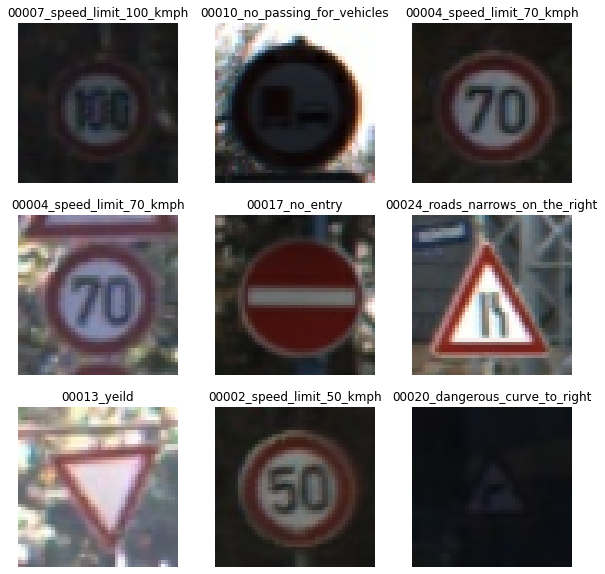

In [10]:
class_names = train_ds.class_names
plt.figure(figsize= (10, 10))
for images, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [11]:
# def image_preprocess(image):
#   image = tf.image.resize(image, [48, 48])
# normalization_layer = keras.layers.experimental.preprocessing.Rescaling(1./ 255)
AUTOTUNE = tf.data.AUTOTUNE


In [12]:
def preprocess_dataset(ds):
  # ds = tf.data.Dataset.list_files(ds)
  # ds = ds.interleave(ds, num_parallel_calls = AUTOTUNE)
  ds = ds.cache()
  ds = ds.prefetch(buffer_size = AUTOTUNE)
  return ds

  # normalized_ds = ds.map(lambda x, y : (normalization_layer(x), y))



  

In [13]:
train_ds = preprocess_dataset(train_ds)

In [15]:
val_ds = preprocess_dataset(val_ds)

# Create the model

In [18]:
model = keras.models.Sequential([
                                 keras.layers.experimental.preprocessing.Rescaling(1./255), 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 keras.layers.Dropout(0.2), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(128, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(58, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(43, activation = 'softmax')
])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
history = model.fit(train_ds, validation_data = val_ds,callbacks= [early_stopping_cb], epochs = 30)


Epoch 1/30
981/981 [==============================] - 14s 14ms/step - loss: 2.5985 - accuracy: 0.2597 - val_loss: 1.4062 - val_accuracy: 0.5474
Epoch 2/30
981/981 [==============================] - 6s 6ms/step - loss: 1.4022 - accuracy: 0.5396 - val_loss: 0.6090 - val_accuracy: 0.7959
Epoch 3/30
981/981 [==============================] - 5s 6ms/step - loss: 0.9322 - accuracy: 0.6841 - val_loss: 0.3554 - val_accuracy: 0.8994
Epoch 4/30
981/981 [==============================] - 5s 5ms/step - loss: 0.7430 - accuracy: 0.7507 - val_loss: 0.2597 - val_accuracy: 0.9374
Epoch 5/30
981/981 [==============================] - 5s 6ms/step - loss: 0.6174 - accuracy: 0.7936 - val_loss: 0.1709 - val_accuracy: 0.9537
Epoch 6/30
981/981 [==============================] - 5s 6ms/step - loss: 0.5406 - accuracy: 0.8226 - val_loss: 0.1284 - val_accuracy: 0.9672
Epoch 7/30
981/981 [==============================] - 5s 6ms/step - loss: 0.4881 - accuracy: 0.8382 - val_loss: 0.1108 - val_accuracy: 0.9781
Epoc

In [ ]:
! 